<a href="https://colab.research.google.com/github/TAUforPython/discretesystem/blob/main/z_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import sympy
import control
import matplotlib.pyplot as plt
import numpy

In [44]:
K, T = sympy.symbols('K, T')

In [59]:
K = 1
T = 2

In [60]:
W = control.tf(K, [T, 1])

In [73]:
Wz = W.sample(1)
Wz

TransferFunction(array([0.39346934]), array([ 1.        , -0.60653066]), 1)

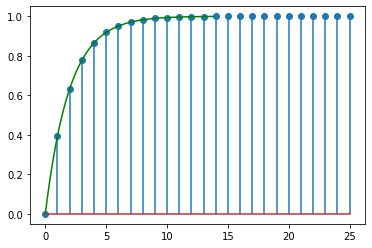

In [74]:
tz, yz = control.step_response(Wz, T_num = 10)

t, y = control.step_response(W)

plt.stem(tz, yz)

plt.plot(t, y, 'g')
plt.show()